In [1]:
import pandas as pd
import numpy as np
from IPython.display import clear_output
import opensmile

In [2]:
import torch
print(torch.__version__)

2.2.1+cu118


In [66]:
import pandas as pd

# Read the file without header and using predefined column names
df = pd.read_csv('trial_metadata.txt', sep=' ', header=None)
df.head()


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
column_rename_mapping = {
    0: 'Speaker_ID',
    1: 'Trial_ID',
    2: 'Codec',
    3: 'Data_Source',
    4: 'Spoofing_Attack_Name',
    5: 'Label',
    6: 'Trim',
    7: 'Progress',
    8: 'Vocoder',
}

# Rename the columns
df = df.rename(columns=column_rename_mapping)

In [ ]:
df.head()

,Speaker_ID,Trial_ID,Codec,Data_Source,Spoofing_Attack_Name,Label,Trim,Progress,Vocoder,9,10,11,12
0,LA_0023,DF_E_2000011,nocodec,asvspoof,A14,spoof,notrim,progress,traditional_vocoder,-,-,-,-
1,TEF2,DF_E_2000013,low_m4a,vcc2020,Task1-team20,spoof,notrim,eval,neural_vocoder_nonautoregressive,Task1,team20,FF,E
2,TGF1,DF_E_2000024,mp3m4a,vcc2020,Task2-team12,spoof,notrim,eval,traditional_vocoder,Task2,team12,FF,G
3,LA_0043,DF_E_2000026,mp3m4a,asvspoof,A09,spoof,notrim,eval,traditional_vocoder,-,-,-,-
4,LA_0021,DF_E_2000027,mp3m4a,asvspoof,A12,spoof,notrim,eval,neural_vocoder_autoregressive,-,-,-,-


In [ ]:
data = df[['Trial_ID','Label','Progress']]

In [ ]:
data['Progress'].value_counts()

Progress
eval        533928
progress     59325
hidden       18576
Name: count, dtype: int64

In [ ]:
import os
import pandas as pd

# Load your DataFrame with file names without extension
# df = pd.read_csv('your_dataframe.csv')

# Directory containing your files
directory = 'F:\\InformationAssurance\\ASVspoof2021_DF_eval_part00\\ASVspoof2021_DF_eval\\flac\\'

# Get list of files in the directory
files = os.listdir(directory)

# Extract file names without extension
file_names_without_extension = [os.path.splitext(file)[0] for file in files]

# Check if file names exist in DataFrame
data.loc[:, 'exists'] = data['Trial_ID'].isin(file_names_without_extension).astype(int)

C:\Users\ahm_a\AppData\Local\Temp\ipykernel_28516\1278896946.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'exists'] = data['Trial_ID'].isin(file_names_without_extension).astype(int)


In [ ]:
data.head()

,Trial_ID,Label,Progress,exists
0,DF_E_2000011,spoof,progress,1
1,DF_E_2000013,spoof,eval,1
2,DF_E_2000024,spoof,eval,1
3,DF_E_2000026,spoof,eval,1
4,DF_E_2000027,spoof,eval,1


In [ ]:
data['exists'].value_counts()

exists
0    458874
1    152955
Name: count, dtype: int64

In [ ]:
data = data[data['exists'] == 1]

In [ ]:
data['Progress'].value_counts()

Progress
eval        133464
progress     14820
hidden        4671
Name: count, dtype: int64

In [ ]:
import pandas as pd
import os
import opensmile
from IPython.display import clear_output

# Define the directory containing the .flac files
flac_directory = 'F:\\InformationAssurance\\ASVspoof2021_DF_eval_part00\\ASVspoof2021_DF_eval\\flac\\'

# Define the output directory for the Excel files
output_directory = 'F:\\InformationAssurance\\ASVspoof2021_DF_eval_part00\\ASVspoof2021_DF_eval\\extracted_features\\'
os.makedirs(output_directory, exist_ok=True)

# Initialize the openSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

count = 0
# Loop through each .flac file in the directory
for filename in os.listdir(flac_directory):
    if filename.endswith('.flac'):
        # Assume 'Trial_ID' can be derived from the filename
        trial_id = os.path.splitext(filename)[0]

        # Define the output file path
        output_file_path = os.path.join(output_directory, f"{trial_id}.xlsx")

        # Check if the output file already exists
        if not os.path.exists(output_file_path):
            # Construct the full path to the current .flac file
            file_path = os.path.join(flac_directory, filename)

            # Extract features only if the output file doesn't exist
            features = smile.process_file(file_path)

            # Save the features to an Excel file
            features.to_excel(output_file_path, index=False)

        count += 1
        clear_output(wait=True)
        print(f'Processed files: {count}')


Processed files: 152955


In [ ]:
# import pandas as pd

# # Define the directory containing the .flac files
# flac_directory = 'F:\\InformationAssurance\\ASVspoof2021_DF_eval_part00\\ASVspoof2021_DF_eval\\flac\\'

# # Define the output directory for the Excel files
# output_directory = 'F:\\InformationAssurance\\ASVspoof2021_DF_eval_part00\\ASVspoof2021_DF_eval\\extracted_features\\'
# os.makedirs(output_directory, exist_ok=True)

# # Initialize the openSMILE feature extractor
# smile = opensmile.Smile(
#     feature_set=opensmile.FeatureSet.eGeMAPSv02,
#     feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
# )
# count = 0
# # Loop through each .flac file in the directory
# for filename in os.listdir(flac_directory):
#     if filename.endswith('.flac'):
#         # Construct the full path to the current .flac file
#         file_path = os.path.join(flac_directory, filename)

#         if not os.path.exists(output_file_path):
#             # Extract features
#             features = smile.process_file(file_path)

#             # Assume 'Trial_ID' can be obtained from the features DataFrame
#             # This part may need to be adjusted depending on how you're getting 'Trial_ID'
#             if 'Trial_ID' in features.columns:
#                 trial_id = features['Trial_ID'].iloc[0]
#             else:
#                 # If 'Trial_ID' is not in the DataFrame, use the filename without extension as a fallback
#                 trial_id = os.path.splitext(filename)[0]

#             # Define the output file path
#             output_file_path = os.path.join(output_directory, f"{trial_id}.xlsx")

#             # Save the features to an Excel file
#             features.to_excel(output_file_path, index=False)

#         count = count + 1
#         clear_output(wait=True)
#         print(count)


In [ ]:
data.to_csv('filtered_df.csv', index = 0)

In [ ]:
data.head()

,Trial_ID,Label,Progress,exists
0,DF_E_2000011,spoof,progress,1
1,DF_E_2000013,spoof,eval,1
2,DF_E_2000024,spoof,eval,1
3,DF_E_2000026,spoof,eval,1
4,DF_E_2000027,spoof,eval,1


In [ ]:
data['Label'].value_counts()

Label
spoof       147420
bonafide      5535
Name: count, dtype: int64

In [ ]:
df = data.copy()
df['Label'] = df['Label'].replace({'spoof': 0, 'bonafide': 1})

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame
# And assuming the 'bonafide' label is represented as 1 (or True) and the other label as 0 (or False)

# Step 1: Separate bonafide rows
bonafide_df = df[df['Label'] == 1]

# Initialize an empty DataFrame for the final result
new_dataset = pd.DataFrame()

# Iterate over each unique value in 'progress'
for progress in df['Progress'].unique():
    # Filter bonafide rows for the current 'progress'
    current_bonafide = bonafide_df[bonafide_df['Progress'] == progress]
    
    # Count of bonafide rows for the current 'progress'
    bonafide_count = len(current_bonafide)
    
    # Exclude already selected bonafide rows, then sample 2x of bonafide count
    non_bonafide_df = df[(df['Progress'] == progress) & (df['Label'] != 1)]
    sampled_rows = non_bonafide_df.sample(n=2*bonafide_count, replace=True)  # replace=True allows re-sampling
    
    # Combine bonafide and sampled rows
    combined = pd.concat([current_bonafide, sampled_rows])
    
    # Append to the new_dataset
    new_dataset = pd.concat([new_dataset, combined])

# Reset index of the new dataset
new_dataset = new_dataset.reset_index(drop=True)

# Now 'new_dataset' contains your desired output


In [ ]:
new_dataset.to_csv('final.csv', index = 0)

In [4]:
new_dataset = pd.read_csv('final.csv')

In [12]:
new_dataset.shape

(16605, 5)

In [13]:
import pandas as pd

def find_excel_with_max_rows_from_df(df):
    max_rows = 0
    max_rows_file_path = ""
    count = 0
    for index, row in df.iterrows():
        if (count % 1000 == 0):
            print(count)
        count = count + 1
        file_path = row['path']  # Assuming the column name that stores the file path is 'path'
        try:
            df_excel = pd.read_excel(file_path)
            num_rows = len(df_excel)
            if num_rows > max_rows:
                max_rows = num_rows
                print(max_rows)
                max_rows_file_path = file_path
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    
    return max_rows_file_path, max_rows


# Use the function
max_rows_file_path, max_rows = find_excel_with_max_rows_from_df(new_dataset)
print(f"The file with the maximum number of rows is {max_rows_file_path} with {max_rows} rows.")


0
284
354
386
444
597
662
693
719
796
857
882
1000
1336
2000
3000
4000
5000
1340
6000
7000
8000
9000
10000
11000
12000
13000
14000
1416
15000
16000
The file with the maximum number of rows is F:\\InformationAssurance\\ASVspoof2021_DF_eval_part00\\ASVspoof2021_DF_eval\\extracted_features\\DF_E_2625224.xlsx with 1416 rows.


In [7]:
new_dataset['path'] = r'F:\\InformationAssurance\\ASVspoof2021_DF_eval_part00\\ASVspoof2021_DF_eval\\extracted_features\\' + new_dataset['Trial_ID'].astype(str) + '.xlsx'


In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np


import torch
import torch.nn as nn

class VoiceLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(VoiceLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)  # Final output layer

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out


class ExcelDataset(Dataset):
    def __init__(self, file_paths, labels_dict, max_length, transforms=None):
        """
        Args:
            file_paths (list of str): List of Excel file paths.
            labels_dict (dict): A dictionary mapping file paths to labels.
            max_length (int): The maximum length of the sequences.
            transforms (callable, optional): Optional transform to be applied on a sample.
        """
        self.data = []
        self.labels = []
        self.max_length = max_length
        self.transforms = transforms
        
        scaler = StandardScaler()  # Initialize scaler

        # Load, preprocess, and pad each file
        for path in file_paths:
            df = pd.read_excel(path)
            # Normalize the features
            normalized_features = scaler.fit_transform(df.values)
            # Pad sequences to match the max_length
            padded_features = np.pad(normalized_features, ((0, self.max_length - len(df)), (0, 0)), 'constant', constant_values=0)
            self.data.append(padded_features)
            
            # Assuming the use of the file path as a key to get the label
            label = labels_dict[path]
            self.labels.append(label)
        
        self.data = [np.array(x) for x in self.data]
        self.labels = np.array(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transforms:
            sample = self.transforms(sample)
        sample = torch.tensor(sample, dtype=torch.float)
        
        label = self.labels[idx]
        label = torch.tensor(label, dtype=torch.long)  # Assuming label is integer-classified
        return sample, label





In [15]:
from torch.utils.data import DataLoader

# Assuming ExcelDataset and DEVICE are defined as before
training_files = new_dataset[new_dataset['Progress'] == 'eval']['path'].astype(str).to_numpy()
validation_files = new_dataset[new_dataset['Progress'] == 'progress']['path'].astype(str).to_numpy()
testing_files = new_dataset[new_dataset['Progress'] == 'hidden']['path'].astype(str).to_numpy()

training_labels = {path: label for path, label in zip(new_dataset[new_dataset['Progress'] == 'eval']['path'], new_dataset[new_dataset['Progress'] == 'eval']['Label'])}
validation_labels = {path: label for path, label in zip(new_dataset[new_dataset['Progress'] == 'progress']['path'], new_dataset[new_dataset['Progress'] == 'progress']['Label'])}
testing_labels = {path: label for path, label in zip(new_dataset[new_dataset['Progress'] == 'hidden']['path'], new_dataset[new_dataset['Progress'] == 'hidden']['Label'])}




In [16]:
new_dataset['Progress'].value_counts()

Progress
eval        10800
progress     4386
hidden       1419
Name: count, dtype: int64

In [17]:
training_dataset = ExcelDataset(training_files, training_labels, 1417)

In [24]:
import pickle

# Assuming your ExcelDataset object is named training_dataset
with open('training_dataset.pkl', 'wb') as f:
    pickle.dump(training_dataset, f)

In [18]:
validation_dataset = ExcelDataset(validation_files, validation_labels, 1417)

In [23]:
import pickle

# Assuming your ExcelDataset object is named training_dataset
with open('validation_dataset.pkl', 'wb') as f:
    pickle.dump(validation_dataset, f)


In [25]:
testing_dataset = ExcelDataset(testing_files, testing_labels, 1417)

In [26]:
import pickle

# Assuming your ExcelDataset object is named training_dataset
with open('testing_dataset.pkl', 'wb') as f:
    pickle.dump(testing_dataset, f)

In [8]:
# Create datasets for training, validation, and testing
# training_dataset = ExcelDataset(training_files, training_labels)
# validation_dataset = ExcelDataset(validation_files, validation_labels)
# testing_dataset = ExcelDataset(testing_files, testing_labels)

# Create data loaders for each dataset
training_loader = DataLoader(training_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)
testing_loader = DataLoader(testing_dataset, batch_size=32, shuffle=False)

In [3]:
import pickle
with open('training_dataset.pkl', 'rb') as f:
    training_dataset = pickle.load(f)


with open('validation_dataset.pkl', 'rb') as f:
    validation_dataset = pickle.load(f)

with open('testing_dataset.pkl', 'rb') as f:
    testing_dataset = pickle.load(f)

In [10]:
input_size = 25  # Number of features in each frame/row
hidden_size = 256  # Size of LSTM hidden states
num_layers = 3  # Number of stacked LSTM layers
num_classes = 2  # Number of output classes (e.g., binary classification)
num_epochs = 50

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model = VoiceLSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=num_classes).to(DEVICE)

In [5]:

# criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# for epoch in range(num_epochs):
#     model.train()  # Set model to training mode
#     training_loss = 0.0
#     for sequences, labels in training_loader:
#         sequences, labels = sequences.to(DEVICE), labels.to(DEVICE)
        
#         optimizer.zero_grad()
#         outputs = model(sequences)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         training_loss += loss.item()
    
#     # Print average training loss per epoch
#     print(f'Epoch {epoch+1}, Training Loss: {training_loss / len(training_loader)}')
    
#     # Validation phase
#     model.eval()  # Set model to evaluation mode
#     validation_loss = 0.0
#     with torch.no_grad():  # No gradients/updates needed for validation
#         for sequences, labels in validation_loader:
#             sequences, labels = sequences.to(DEVICE), labels.to(DEVICE)
#             outputs = model(sequences)
#             loss = criterion(outputs, labels)
#             validation_loss += loss.item()
    
#     # Print average validation loss per epoch
#     print(f'Epoch {epoch+1}, Validation Loss: {validation_loss / len(validation_loader)}')

# # Optional: Testing phase after training and validation
# model.eval()  # Ensure model is in evaluation mode
# test_loss = 0.0
# with torch.no_grad():  # No updates needed for testing
#     for sequences, labels in testing_loader:
#         sequences, labels = sequences.to(DEVICE), labels.to(DEVICE)
#         outputs = model(sequences)
#         loss = criterion(outputs, labels)
#         test_loss += loss.item()

# # Print average test loss
# print(f'Test Loss: {test_loss / len(testing_loader)}')


In [34]:


!pip install tqdm

In [12]:
from tqdm import tqdm
from torch.utils.data import DataLoader

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
training_loss_arr =[]
val_loss_arr = []
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    training_loss = 0.0
    
    # Wrap training data loader with tqdm for a progress bar
    for sequences, labels in tqdm(training_loader, desc=f'Epoch {epoch+1} Training'):
        sequences, labels = sequences.to(DEVICE), labels.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
    
    # Print average training loss per epoch
    print(f'Epoch {epoch+1}, Training Loss: {training_loss / len(training_loader)}')
    training_loss_arr.append(training_loss / len(training_loader))
    # Validation phase
    model.eval()  # Set model to evaluation mode
    validation_loss = 0.0
    
    # Wrap validation data loader with tqdm for a progress bar
    with torch.no_grad():  # No gradients/updates needed for validation
        for sequences, labels in tqdm(validation_loader, desc=f'Epoch {epoch+1} Validation'):
            sequences, labels = sequences.to(DEVICE), labels.to(DEVICE)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()
    
    # Print average validation loss per epoch
    print(f'Epoch {epoch+1}, Validation Loss: {validation_loss / len(validation_loader)}')
    val_loss_arr.append(validation_loss / len(validation_loader))


        # Save checkpoint after each epoch
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'training_loss': training_loss_arr,
        'validation_loss': val_loss_arr,
    }
    torch.save(checkpoint, f'checkpoint_epoch_{epoch+1}.pth')

# Optional: Testing phase after training and validation
model.eval()  # Ensure model is in evaluation mode
test_loss = 0.0

# Wrap testing data loader with tqdm for a progress bar
with torch.no_grad():  # No updates needed for testing
    for sequences, labels in tqdm(testing_loader, desc='Testing'):
        sequences, labels = sequences.to(DEVICE), labels.to(DEVICE)
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

# Print average test loss
print(f'Test Loss: {test_loss / len(testing_loader)}')


Epoch 1 Training:   0%|          | 0/338 [00:00<?, ?it/s]

Epoch 1 Training: 100%|██████████| 338/338 [06:47<00:00,  1.20s/it]


Epoch 1, Training Loss: 0.6384020445967568


Epoch 1 Validation: 100%|██████████| 138/138 [01:08<00:00,  2.02it/s]


Epoch 1, Validation Loss: 0.6353447901597922


Epoch 2 Training: 100%|██████████| 338/338 [08:05<00:00,  1.44s/it]


Epoch 2, Training Loss: 0.6373139621590721


Epoch 2 Validation: 100%|██████████| 138/138 [01:31<00:00,  1.51it/s]


Epoch 2, Validation Loss: 0.6349471269742303


Epoch 3 Training: 100%|██████████| 338/338 [08:27<00:00,  1.50s/it]


Epoch 3, Training Loss: 0.6372755557827695


Epoch 3 Validation: 100%|██████████| 138/138 [01:07<00:00,  2.04it/s]


Epoch 3, Validation Loss: 0.6349655854097311


Epoch 4 Training: 100%|██████████| 338/338 [07:16<00:00,  1.29s/it]


Epoch 4, Training Loss: 0.6372753471665128


Epoch 4 Validation: 100%|██████████| 138/138 [01:05<00:00,  2.10it/s]


Epoch 4, Validation Loss: 0.6350999791984973


Epoch 5 Training: 100%|██████████| 338/338 [07:07<00:00,  1.26s/it]


Epoch 5, Training Loss: 0.6377173790917594


Epoch 5 Validation: 100%|██████████| 138/138 [01:06<00:00,  2.08it/s]


Epoch 5, Validation Loss: 0.6353126375571542


Epoch 6 Training: 100%|██████████| 338/338 [06:52<00:00,  1.22s/it]


Epoch 6, Training Loss: 0.6369305021135059


Epoch 6 Validation: 100%|██████████| 138/138 [01:06<00:00,  2.09it/s]


Epoch 6, Validation Loss: 0.6351212772770204


Epoch 7 Training: 100%|██████████| 338/338 [08:13<00:00,  1.46s/it]


Epoch 7, Training Loss: 0.6367259293618287


Epoch 7 Validation: 100%|██████████| 138/138 [01:19<00:00,  1.75it/s]


Epoch 7, Validation Loss: 0.6352470828139264


Epoch 8 Training: 100%|██████████| 338/338 [08:22<00:00,  1.49s/it]


Epoch 8, Training Loss: 0.6377316213394764


Epoch 8 Validation: 100%|██████████| 138/138 [01:14<00:00,  1.86it/s]


Epoch 8, Validation Loss: 0.6401056509087051


Epoch 9 Training: 100%|██████████| 338/338 [08:34<00:00,  1.52s/it]


Epoch 9, Training Loss: 0.6381222298864783


Epoch 9 Validation: 100%|██████████| 138/138 [01:17<00:00,  1.78it/s]


Epoch 9, Validation Loss: 0.6349344575318737


Epoch 10 Training: 100%|██████████| 338/338 [07:37<00:00,  1.35s/it]


Epoch 10, Training Loss: 0.6367975828739313


Epoch 10 Validation: 100%|██████████| 138/138 [01:06<00:00,  2.09it/s]


Epoch 10, Validation Loss: 0.6362160383791163


Epoch 11 Training: 100%|██████████| 338/338 [07:04<00:00,  1.26s/it]


Epoch 11, Training Loss: 0.6371653157578417


Epoch 11 Validation: 100%|██████████| 138/138 [01:07<00:00,  2.06it/s]


Epoch 11, Validation Loss: 0.6351516179848409


Epoch 12 Training: 100%|██████████| 338/338 [06:55<00:00,  1.23s/it]


Epoch 12, Training Loss: 0.6370693165698701


Epoch 12 Validation: 100%|██████████| 138/138 [01:04<00:00,  2.14it/s]


Epoch 12, Validation Loss: 0.6351428325625433


Epoch 13 Training: 100%|██████████| 338/338 [07:02<00:00,  1.25s/it]


Epoch 13, Training Loss: 0.6367693318594136


Epoch 13 Validation: 100%|██████████| 138/138 [01:05<00:00,  2.11it/s]


Epoch 13, Validation Loss: 0.6352573140807773


Epoch 14 Training: 100%|██████████| 338/338 [07:42<00:00,  1.37s/it]


Epoch 14, Training Loss: 0.6370319605050002


Epoch 14 Validation: 100%|██████████| 138/138 [01:04<00:00,  2.13it/s]


Epoch 14, Validation Loss: 0.6350041027518286


Epoch 15 Training: 100%|██████████| 338/338 [06:55<00:00,  1.23s/it]


Epoch 15, Training Loss: 0.6371932117896673


Epoch 15 Validation: 100%|██████████| 138/138 [01:04<00:00,  2.15it/s]


Epoch 15, Validation Loss: 0.635031085299409


Epoch 16 Training: 100%|██████████| 338/338 [07:22<00:00,  1.31s/it]


Epoch 16, Training Loss: 0.6368588269109556


Epoch 16 Validation: 100%|██████████| 138/138 [01:12<00:00,  1.89it/s]


Epoch 16, Validation Loss: 0.6351122430701187


Epoch 17 Training: 100%|██████████| 338/338 [06:48<00:00,  1.21s/it]


Epoch 17, Training Loss: 0.63695064848344


Epoch 17 Validation: 100%|██████████| 138/138 [01:05<00:00,  2.12it/s]


Epoch 17, Validation Loss: 0.6349691418202027


Epoch 18 Training: 100%|██████████| 338/338 [07:11<00:00,  1.28s/it]


Epoch 18, Training Loss: 0.6368675889700828


Epoch 18 Validation: 100%|██████████| 138/138 [01:07<00:00,  2.06it/s]


Epoch 18, Validation Loss: 0.6349411814109139


Epoch 19 Training: 100%|██████████| 338/338 [07:07<00:00,  1.27s/it]


Epoch 19, Training Loss: 0.6368821040236738


Epoch 19 Validation: 100%|██████████| 138/138 [01:03<00:00,  2.17it/s]


Epoch 19, Validation Loss: 0.635189307772595


Epoch 20 Training: 100%|██████████| 338/338 [07:11<00:00,  1.28s/it]


Epoch 20, Training Loss: 0.6366392393436657


Epoch 20 Validation: 100%|██████████| 138/138 [01:05<00:00,  2.10it/s]


Epoch 20, Validation Loss: 0.6349582006965858


Epoch 21 Training: 100%|██████████| 338/338 [09:38<00:00,  1.71s/it]


Epoch 21, Training Loss: 0.6368158052306203


Epoch 21 Validation: 100%|██████████| 138/138 [02:15<00:00,  1.02it/s]


Epoch 21, Validation Loss: 0.6350772171348765


Epoch 22 Training: 100%|██████████| 338/338 [12:55<00:00,  2.30s/it] 


Epoch 22, Training Loss: 0.6363823648387864


Epoch 22 Validation: 100%|██████████| 138/138 [00:57<00:00,  2.38it/s]


Epoch 22, Validation Loss: 0.6358086836078892


Epoch 23 Training: 100%|██████████| 338/338 [06:19<00:00,  1.12s/it]


Epoch 23, Training Loss: 0.6367606394566022


Epoch 23 Validation: 100%|██████████| 138/138 [01:08<00:00,  2.02it/s]


Epoch 23, Validation Loss: 0.6355653627627138


Epoch 24 Training: 100%|██████████| 338/338 [07:17<00:00,  1.30s/it]


Epoch 24, Training Loss: 0.6367924639282847


Epoch 24 Validation: 100%|██████████| 138/138 [01:02<00:00,  2.21it/s]


Epoch 24, Validation Loss: 0.6353388962106429


Epoch 25 Training: 100%|██████████| 338/338 [06:20<00:00,  1.13s/it]


Epoch 25, Training Loss: 0.636649899845998


Epoch 25 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.48it/s]


Epoch 25, Validation Loss: 0.635045334264852


Epoch 26 Training: 100%|██████████| 338/338 [05:19<00:00,  1.06it/s]


Epoch 26, Training Loss: 0.6367895630513423


Epoch 26 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.53it/s]


Epoch 26, Validation Loss: 0.6349802287160486


Epoch 27 Training: 100%|██████████| 338/338 [05:36<00:00,  1.00it/s]


Epoch 27, Training Loss: 0.6366605077974895


Epoch 27 Validation: 100%|██████████| 138/138 [00:57<00:00,  2.40it/s]


Epoch 27, Validation Loss: 0.6352419263642767


Epoch 28 Training: 100%|██████████| 338/338 [05:28<00:00,  1.03it/s]


Epoch 28, Training Loss: 0.6368472600829672


Epoch 28 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.50it/s]


Epoch 28, Validation Loss: 0.6349855076143707


Epoch 29 Training: 100%|██████████| 338/338 [05:47<00:00,  1.03s/it]


Epoch 29, Training Loss: 0.6367280480600673


Epoch 29 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.54it/s]


Epoch 29, Validation Loss: 0.6351016770670379


Epoch 30 Training: 100%|██████████| 338/338 [05:08<00:00,  1.10it/s]


Epoch 30, Training Loss: 0.6369091961863478


Epoch 30 Validation: 100%|██████████| 138/138 [00:59<00:00,  2.33it/s]


Epoch 30, Validation Loss: 0.6349805666916613


Epoch 31 Training: 100%|██████████| 338/338 [04:55<00:00,  1.15it/s]


Epoch 31, Training Loss: 0.6367226366460677


Epoch 31 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.60it/s]


Epoch 31, Validation Loss: 0.6350636361301809


Epoch 32 Training: 100%|██████████| 338/338 [04:56<00:00,  1.14it/s]


Epoch 32, Training Loss: 0.6368107786898077


Epoch 32 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.49it/s]


Epoch 32, Validation Loss: 0.6350494938484137


Epoch 33 Training: 100%|██████████| 338/338 [04:55<00:00,  1.14it/s]


Epoch 33, Training Loss: 0.6367786489647521


Epoch 33 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.58it/s]


Epoch 33, Validation Loss: 0.635489190834156


Epoch 34 Training: 100%|██████████| 338/338 [04:53<00:00,  1.15it/s]


Epoch 34, Training Loss: 0.6367384563889024


Epoch 34 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.59it/s]


Epoch 34, Validation Loss: 0.6349624779777251


Epoch 35 Training: 100%|██████████| 338/338 [04:54<00:00,  1.15it/s]


Epoch 35, Training Loss: 0.6366712154721367


Epoch 35 Validation: 100%|██████████| 138/138 [00:56<00:00,  2.44it/s]


Epoch 35, Validation Loss: 0.634990553709044


Epoch 36 Training: 100%|██████████| 338/338 [04:51<00:00,  1.16it/s]


Epoch 36, Training Loss: 0.6364774845055574


Epoch 36 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.57it/s]


Epoch 36, Validation Loss: 0.63527412712574


Epoch 37 Training: 100%|██████████| 338/338 [04:53<00:00,  1.15it/s]


Epoch 37, Training Loss: 0.6366524669898332


Epoch 37 Validation: 100%|██████████| 138/138 [00:50<00:00,  2.71it/s]


Epoch 37, Validation Loss: 0.6358369988375816


Epoch 38 Training: 100%|██████████| 338/338 [04:55<00:00,  1.14it/s]


Epoch 38, Training Loss: 0.636928469383505


Epoch 38 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.54it/s]


Epoch 38, Validation Loss: 0.6356763828923737


Epoch 39 Training: 100%|██████████| 338/338 [04:51<00:00,  1.16it/s]


Epoch 39, Training Loss: 0.636782511187023


Epoch 39 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.59it/s]


Epoch 39, Validation Loss: 0.6351157260545786


Epoch 40 Training: 100%|██████████| 338/338 [04:52<00:00,  1.16it/s]


Epoch 40, Training Loss: 0.6370915210634999


Epoch 40 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.54it/s]


Epoch 40, Validation Loss: 0.6350183957728787


Epoch 41 Training: 100%|██████████| 338/338 [04:53<00:00,  1.15it/s]


Epoch 41, Training Loss: 0.6366200655169741


Epoch 41 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.58it/s]


Epoch 41, Validation Loss: 0.6349719672099404


Epoch 42 Training: 100%|██████████| 338/338 [04:48<00:00,  1.17it/s]


Epoch 42, Training Loss: 0.6365232323930108


Epoch 42 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.56it/s]


Epoch 42, Validation Loss: 0.6349420035662858


Epoch 43 Training: 100%|██████████| 338/338 [04:56<00:00,  1.14it/s]


Epoch 43, Training Loss: 0.636708826796543


Epoch 43 Validation: 100%|██████████| 138/138 [00:52<00:00,  2.63it/s]


Epoch 43, Validation Loss: 0.6349386166835177


Epoch 44 Training: 100%|██████████| 338/338 [04:54<00:00,  1.15it/s]


Epoch 44, Training Loss: 0.636613791246386


Epoch 44 Validation: 100%|██████████| 138/138 [00:57<00:00,  2.38it/s]


Epoch 44, Validation Loss: 0.6350208203429761


Epoch 45 Training: 100%|██████████| 338/338 [04:47<00:00,  1.17it/s]


Epoch 45, Training Loss: 0.6367000651782786


Epoch 45 Validation: 100%|██████████| 138/138 [00:52<00:00,  2.63it/s]


Epoch 45, Validation Loss: 0.6350936172665029


Epoch 46 Training: 100%|██████████| 338/338 [04:50<00:00,  1.16it/s]


Epoch 46, Training Loss: 0.636895181159296


Epoch 46 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.57it/s]


Epoch 46, Validation Loss: 0.6353170949479808


Epoch 47 Training: 100%|██████████| 338/338 [04:50<00:00,  1.16it/s]


Epoch 47, Training Loss: 0.6364530147709084


Epoch 47 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.56it/s]


Epoch 47, Validation Loss: 0.6350112859753595


Epoch 48 Training: 100%|██████████| 338/338 [04:50<00:00,  1.16it/s]


Epoch 48, Training Loss: 0.6367925075736977


Epoch 48 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.54it/s]


Epoch 48, Validation Loss: 0.6350122273400209


Epoch 49 Training: 100%|██████████| 338/338 [04:58<00:00,  1.13it/s]


Epoch 49, Training Loss: 0.6365788444964844


Epoch 49 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.58it/s]


Epoch 49, Validation Loss: 0.635543878743614


Epoch 50 Training: 100%|██████████| 338/338 [04:56<00:00,  1.14it/s]


Epoch 50, Training Loss: 0.6368703289321188


Epoch 50 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.58it/s]


Epoch 50, Validation Loss: 0.6349392271992089


Testing: 100%|██████████| 45/45 [00:19<00:00,  2.28it/s]


Test Loss: 0.6330933147006564


In [13]:
# def load_checkpoint(model, optimizer, filename='checkpoint.pth'):
#     # Note: Input model & optimizer should be pre-defined. This just loads the weights and returns the epoch.
#     checkpoint = torch.load(filename)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#     epoch = checkpoint['epoch']
#     training_loss_arr = checkpoint['training_loss']
#     validation_loss_arr = checkpoint['validation_loss']
    
#     return model, optimizer, epoch, training_loss_arr, validation_loss_arr

# # Example of loading a checkpoint
# model, optimizer, start_epoch, training_loss_arr, val_loss_arr = load_checkpoint(model, optimizer, 'checkpoint_epoch_X.pth')


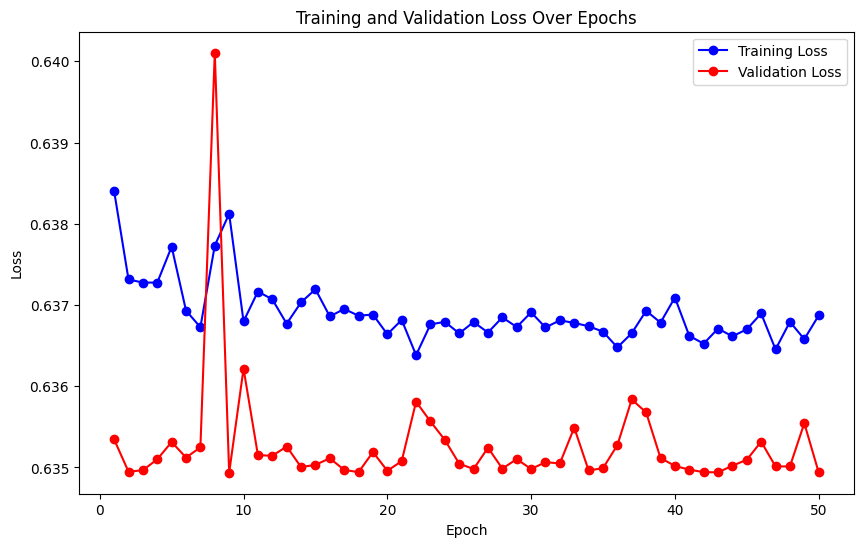

In [14]:
import matplotlib.pyplot as plt

# Assuming you have your training and validation loss stored in two lists:
training_loss_arr =   training_loss_arr# Replace these values with your actual training loss
val_loss_arr =  val_loss_arr# Replace these values with your actual validation loss

# Generating a range of epoch numbers (starting from 1 to the length of the loss array)
epochs = range(1, len(training_loss_arr) + 1)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(epochs, training_loss_arr, 'bo-', label='Training Loss')  # 'bo-' gives us blue color, dot markers, and solid lines
plt.plot(epochs, val_loss_arr, 'ro-', label='Validation Loss')  # 'ro-' gives us red color, dot markers, and solid lines
plt.title('Training and Validation Loss Over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend()  # Display the legend to differentiate between training and validation loss

plt.show()  # Display the plot


In [15]:
from tqdm import tqdm
from torch.utils.data import DataLoader

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
training_loss_arr =[]
val_loss_arr = []
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    training_loss = 0.0
    
    # Wrap training data loader with tqdm for a progress bar
    for sequences, labels in tqdm(training_loader, desc=f'Epoch {epoch+1} Training'):
        sequences, labels = sequences.to(DEVICE), labels.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
    
    # Print average training loss per epoch
    print(f'Epoch {epoch+1}, Training Loss: {training_loss / len(training_loader)}')
    training_loss_arr.append(training_loss / len(training_loader))
    # Validation phase
    model.eval()  # Set model to evaluation mode
    validation_loss = 0.0
    
    # Wrap validation data loader with tqdm for a progress bar
    with torch.no_grad():  # No gradients/updates needed for validation
        for sequences, labels in tqdm(validation_loader, desc=f'Epoch {epoch+1} Validation'):
            sequences, labels = sequences.to(DEVICE), labels.to(DEVICE)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()
    
    # Print average validation loss per epoch
    print(f'Epoch {epoch+1}, Validation Loss: {validation_loss / len(validation_loader)}')
    val_loss_arr.append(validation_loss / len(validation_loader))


        # Save checkpoint after each epoch
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'training_loss': training_loss_arr,
        'validation_loss': val_loss_arr,
    }
    torch.save(checkpoint, f'checkpoint_epoch_{epoch+1}.pth')

# Optional: Testing phase after training and validation
model.eval()  # Ensure model is in evaluation mode
test_loss = 0.0

# Wrap testing data loader with tqdm for a progress bar
with torch.no_grad():  # No updates needed for testing
    for sequences, labels in tqdm(testing_loader, desc='Testing'):
        sequences, labels = sequences.to(DEVICE), labels.to(DEVICE)
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

# Print average test loss
print(f'Test Loss: {test_loss / len(testing_loader)}')


Epoch 1 Training: 100%|██████████| 338/338 [05:34<00:00,  1.01it/s]


Epoch 1, Training Loss: 0.637297365439714


Epoch 1 Validation: 100%|██████████| 138/138 [01:05<00:00,  2.09it/s]


Epoch 1, Validation Loss: 0.6360964604477951


Epoch 2 Training: 100%|██████████| 338/338 [06:06<00:00,  1.09s/it]


Epoch 2, Training Loss: 0.6368275061690596


Epoch 2 Validation: 100%|██████████| 138/138 [00:58<00:00,  2.38it/s]


Epoch 2, Validation Loss: 0.6354301738134329


Epoch 3 Training: 100%|██████████| 338/338 [06:17<00:00,  1.12s/it]


Epoch 3, Training Loss: 0.6371213764657636


Epoch 3 Validation: 100%|██████████| 138/138 [01:01<00:00,  2.25it/s]


Epoch 3, Validation Loss: 0.635613210823225


Epoch 4 Training: 100%|██████████| 338/338 [06:04<00:00,  1.08s/it]


Epoch 4, Training Loss: 0.6371190331920364


Epoch 4 Validation: 100%|██████████| 138/138 [00:59<00:00,  2.32it/s]


Epoch 4, Validation Loss: 0.6354976367691288


Epoch 5 Training: 100%|██████████| 338/338 [06:09<00:00,  1.09s/it]


Epoch 5, Training Loss: 0.6369275639395742


Epoch 5 Validation: 100%|██████████| 138/138 [00:58<00:00,  2.37it/s]


Epoch 5, Validation Loss: 0.6354826248210409


Epoch 6 Training: 100%|██████████| 338/338 [05:36<00:00,  1.00it/s]


Epoch 6, Training Loss: 0.6370990612274091


Epoch 6 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.51it/s]


Epoch 6, Validation Loss: 0.635172405536624


Epoch 7 Training: 100%|██████████| 338/338 [05:39<00:00,  1.01s/it]


Epoch 7, Training Loss: 0.6366659639149728


Epoch 7 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.56it/s]


Epoch 7, Validation Loss: 0.6349515286476716


Epoch 8 Training: 100%|██████████| 338/338 [05:34<00:00,  1.01it/s]


Epoch 8, Training Loss: 0.6371882504965427


Epoch 8 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.49it/s]


Epoch 8, Validation Loss: 0.634935339939767


Epoch 9 Training: 100%|██████████| 338/338 [05:29<00:00,  1.02it/s]


Epoch 9, Training Loss: 0.6370450856064903


Epoch 9 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.48it/s]


Epoch 9, Validation Loss: 0.6349559270817301


Epoch 10 Training: 100%|██████████| 338/338 [05:25<00:00,  1.04it/s]


Epoch 10, Training Loss: 0.6367720651203359


Epoch 10 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.56it/s]


Epoch 10, Validation Loss: 0.6349333606768346


Epoch 11 Training: 100%|██████████| 338/338 [05:43<00:00,  1.02s/it]


Epoch 11, Training Loss: 0.6371781859524857


Epoch 11 Validation: 100%|██████████| 138/138 [00:56<00:00,  2.46it/s]


Epoch 11, Validation Loss: 0.6352094303870547


Epoch 12 Training: 100%|██████████| 338/338 [05:39<00:00,  1.00s/it]


Epoch 12, Training Loss: 0.6373747806753632


Epoch 12 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.50it/s]


Epoch 12, Validation Loss: 0.6351917446523473


Epoch 13 Training: 100%|██████████| 338/338 [05:31<00:00,  1.02it/s]


Epoch 13, Training Loss: 0.6370713865968602


Epoch 13 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.51it/s]


Epoch 13, Validation Loss: 0.634937503847523


Epoch 14 Training: 100%|██████████| 338/338 [05:31<00:00,  1.02it/s]


Epoch 14, Training Loss: 0.6369724829168715


Epoch 14 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.53it/s]


Epoch 14, Validation Loss: 0.6354138451641884


Epoch 15 Training: 100%|██████████| 338/338 [05:22<00:00,  1.05it/s]


Epoch 15, Training Loss: 0.6374201111539581


Epoch 15 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.49it/s]


Epoch 15, Validation Loss: 0.6349414995183116


Epoch 16 Training: 100%|██████████| 338/338 [05:33<00:00,  1.01it/s]


Epoch 16, Training Loss: 0.6368071925357954


Epoch 16 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.48it/s]


Epoch 16, Validation Loss: 0.6351252211176831


Epoch 17 Training: 100%|██████████| 338/338 [05:26<00:00,  1.04it/s]


Epoch 17, Training Loss: 0.6368524801625303


Epoch 17 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.55it/s]


Epoch 17, Validation Loss: 0.6352148965217065


Epoch 18 Training: 100%|██████████| 338/338 [05:26<00:00,  1.04it/s]


Epoch 18, Training Loss: 0.6372787356376648


Epoch 18 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.52it/s]


Epoch 18, Validation Loss: 0.6350949184186216


Epoch 19 Training: 100%|██████████| 338/338 [05:30<00:00,  1.02it/s]


Epoch 19, Training Loss: 0.6368452729381753


Epoch 19 Validation: 100%|██████████| 138/138 [00:52<00:00,  2.62it/s]


Epoch 19, Validation Loss: 0.6356773801903793


Epoch 20 Training: 100%|██████████| 338/338 [05:32<00:00,  1.02it/s]


Epoch 20, Training Loss: 0.636850219065621


Epoch 20 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.52it/s]


Epoch 20, Validation Loss: 0.6349612102992293


Epoch 21 Training: 100%|██████████| 338/338 [05:36<00:00,  1.00it/s]


Epoch 21, Training Loss: 0.6370338963333672


Epoch 21 Validation: 100%|██████████| 138/138 [00:53<00:00,  2.58it/s]


Epoch 21, Validation Loss: 0.6353697409664375


Epoch 22 Training: 100%|██████████| 338/338 [05:42<00:00,  1.01s/it]


Epoch 22, Training Loss: 0.6370343321702889


Epoch 22 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.52it/s]


Epoch 22, Validation Loss: 0.6350985240677128


Epoch 23 Training: 100%|██████████| 338/338 [05:35<00:00,  1.01it/s]


Epoch 23, Training Loss: 0.6369950360447697


Epoch 23 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.50it/s]


Epoch 23, Validation Loss: 0.6349702026101126


Epoch 24 Training: 100%|██████████| 338/338 [05:31<00:00,  1.02it/s]


Epoch 24, Training Loss: 0.6372083234187413


Epoch 24 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.50it/s]


Epoch 24, Validation Loss: 0.6349848472121833


Epoch 25 Training: 100%|██████████| 338/338 [05:36<00:00,  1.01it/s]


Epoch 25, Training Loss: 0.6368754556369499


Epoch 25 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.49it/s]


Epoch 25, Validation Loss: 0.6349385972472205


Epoch 26 Training: 100%|██████████| 338/338 [05:41<00:00,  1.01s/it]


Epoch 26, Training Loss: 0.6369487136249712


Epoch 26 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.53it/s]


Epoch 26, Validation Loss: 0.6358120577490848


Epoch 27 Training: 100%|██████████| 338/338 [06:10<00:00,  1.10s/it]


Epoch 27, Training Loss: 0.6370695372657663


Epoch 27 Validation: 100%|██████████| 138/138 [00:59<00:00,  2.31it/s]


Epoch 27, Validation Loss: 0.6352493715459022


Epoch 28 Training: 100%|██████████| 338/338 [06:28<00:00,  1.15s/it]


Epoch 28, Training Loss: 0.6369169858785776


Epoch 28 Validation: 100%|██████████| 138/138 [01:25<00:00,  1.62it/s]


Epoch 28, Validation Loss: 0.6349502616170524


Epoch 29 Training: 100%|██████████| 338/338 [09:28<00:00,  1.68s/it]


Epoch 29, Training Loss: 0.636786460435602


Epoch 29 Validation: 100%|██████████| 138/138 [01:21<00:00,  1.70it/s]


Epoch 29, Validation Loss: 0.6351996105218279


Epoch 30 Training: 100%|██████████| 338/338 [08:52<00:00,  1.57s/it]


Epoch 30, Training Loss: 0.6369275870407827


Epoch 30 Validation: 100%|██████████| 138/138 [01:20<00:00,  1.72it/s]


Epoch 30, Validation Loss: 0.6363587198050126


Epoch 31 Training: 100%|██████████| 338/338 [09:14<00:00,  1.64s/it]


Epoch 31, Training Loss: 0.6368335027842832


Epoch 31 Validation: 100%|██████████| 138/138 [01:17<00:00,  1.78it/s]


Epoch 31, Validation Loss: 0.6350185860326325


Epoch 32 Training: 100%|██████████| 338/338 [08:47<00:00,  1.56s/it]


Epoch 32, Training Loss: 0.6376892471983588


Epoch 32 Validation: 100%|██████████| 138/138 [01:05<00:00,  2.12it/s]


Epoch 32, Validation Loss: 0.6349796078343323


Epoch 33 Training: 100%|██████████| 338/338 [08:17<00:00,  1.47s/it]


Epoch 33, Training Loss: 0.6371163367872408


Epoch 33 Validation: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]


Epoch 33, Validation Loss: 0.6351198167472646


Epoch 34 Training: 100%|██████████| 338/338 [09:10<00:00,  1.63s/it]


Epoch 34, Training Loss: 0.6369071509358446


Epoch 34 Validation: 100%|██████████| 138/138 [01:18<00:00,  1.76it/s]


Epoch 34, Validation Loss: 0.6349546686894652


Epoch 35 Training: 100%|██████████| 338/338 [10:19<00:00,  1.83s/it]


Epoch 35, Training Loss: 0.6368244784999881


Epoch 35 Validation: 100%|██████████| 138/138 [01:21<00:00,  1.70it/s]


Epoch 35, Validation Loss: 0.6349960872228595


Epoch 36 Training: 100%|██████████| 338/338 [10:12<00:00,  1.81s/it]


Epoch 36, Training Loss: 0.6369053046907899


Epoch 36 Validation: 100%|██████████| 138/138 [01:38<00:00,  1.40it/s]


Epoch 36, Validation Loss: 0.6350561982911566


Epoch 37 Training: 100%|██████████| 338/338 [11:13<00:00,  1.99s/it]


Epoch 37, Training Loss: 0.6369789290357624


Epoch 37 Validation: 100%|██████████| 138/138 [02:43<00:00,  1.19s/it]


Epoch 37, Validation Loss: 0.6353367681520573


Epoch 38 Training: 100%|██████████| 338/338 [16:27<00:00,  2.92s/it]


Epoch 38, Training Loss: 0.6367609825359999


Epoch 38 Validation: 100%|██████████| 138/138 [02:35<00:00,  1.13s/it]


Epoch 38, Validation Loss: 0.6351105812667073


Epoch 39 Training: 100%|██████████| 338/338 [17:11<00:00,  3.05s/it]


Epoch 39, Training Loss: 0.6369596934882846


Epoch 39 Validation: 100%|██████████| 138/138 [01:56<00:00,  1.19it/s]


Epoch 39, Validation Loss: 0.6350148214378218


Epoch 40 Training: 100%|██████████| 338/338 [26:16<00:00,  4.66s/it]


Epoch 40, Training Loss: 0.637125831824788


Epoch 40 Validation: 100%|██████████| 138/138 [03:34<00:00,  1.55s/it]


Epoch 40, Validation Loss: 0.6350820427355559


Epoch 41 Training: 100%|██████████| 338/338 [28:48<00:00,  5.11s/it]


Epoch 41, Training Loss: 0.6365822238858635


Epoch 41 Validation: 100%|██████████| 138/138 [03:22<00:00,  1.47s/it]


Epoch 41, Validation Loss: 0.635196186710095


Epoch 42 Training: 100%|██████████| 338/338 [2:09:43<00:00, 23.03s/it]   


Epoch 42, Training Loss: 0.6368755365793521


Epoch 42 Validation: 100%|██████████| 138/138 [01:15<00:00,  1.83it/s]


Epoch 42, Validation Loss: 0.6349332883306171


Epoch 43 Training: 100%|██████████| 338/338 [06:50<00:00,  1.21s/it]


Epoch 43, Training Loss: 0.6366746436209368


Epoch 43 Validation: 100%|██████████| 138/138 [01:00<00:00,  2.28it/s]


Epoch 43, Validation Loss: 0.6350263953208923


Epoch 44 Training: 100%|██████████| 338/338 [06:09<00:00,  1.09s/it]


Epoch 44, Training Loss: 0.6367975582737895


Epoch 44 Validation: 100%|██████████| 138/138 [01:18<00:00,  1.76it/s]


Epoch 44, Validation Loss: 0.6360301289005555


Epoch 45 Training: 100%|██████████| 338/338 [08:03<00:00,  1.43s/it]


Epoch 45, Training Loss: 0.6372842443941613


Epoch 45 Validation: 100%|██████████| 138/138 [00:58<00:00,  2.35it/s]


Epoch 45, Validation Loss: 0.6358561511488928


Epoch 46 Training: 100%|██████████| 338/338 [06:08<00:00,  1.09s/it]


Epoch 46, Training Loss: 0.6370259761457613


Epoch 46 Validation: 100%|██████████| 138/138 [00:56<00:00,  2.42it/s]


Epoch 46, Validation Loss: 0.6349441471739091


Epoch 47 Training: 100%|██████████| 338/338 [05:43<00:00,  1.02s/it]


Epoch 47, Training Loss: 0.636972212138966


Epoch 47 Validation: 100%|██████████| 138/138 [00:54<00:00,  2.53it/s]


Epoch 47, Validation Loss: 0.6349343124075212


Epoch 48 Training: 100%|██████████| 338/338 [05:40<00:00,  1.01s/it]


Epoch 48, Training Loss: 0.6372447653987704


Epoch 48 Validation: 100%|██████████| 138/138 [00:56<00:00,  2.46it/s]


Epoch 48, Validation Loss: 0.6349417858797571


Epoch 49 Training: 100%|██████████| 338/338 [05:45<00:00,  1.02s/it]


Epoch 49, Training Loss: 0.6369871293475642


Epoch 49 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.47it/s]


Epoch 49, Validation Loss: 0.6352037696734719


Epoch 50 Training: 100%|██████████| 338/338 [05:47<00:00,  1.03s/it]


Epoch 50, Training Loss: 0.6369712081181227


Epoch 50 Validation: 100%|██████████| 138/138 [00:55<00:00,  2.47it/s]


Epoch 50, Validation Loss: 0.6351618140503981


Testing: 100%|██████████| 45/45 [00:19<00:00,  2.36it/s]

Test Loss: 0.6334531863530477


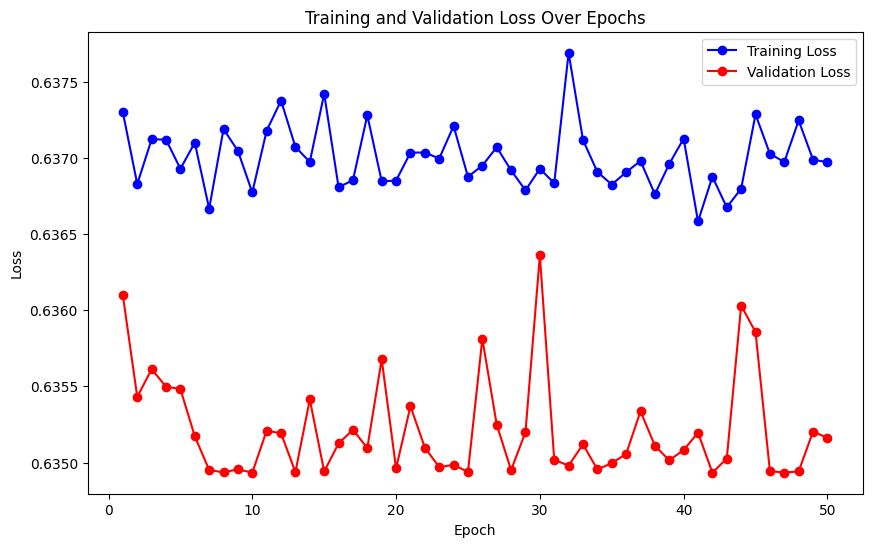

In [16]:
import matplotlib.pyplot as plt

# Assuming you have your training and validation loss stored in two lists:
training_loss_arr =   training_loss_arr# Replace these values with your actual training loss
val_loss_arr =  val_loss_arr# Replace these values with your actual validation loss

# Generating a range of epoch numbers (starting from 1 to the length of the loss array)
epochs = range(1, len(training_loss_arr) + 1)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(epochs, training_loss_arr, 'bo-', label='Training Loss')  # 'bo-' gives us blue color, dot markers, and solid lines
plt.plot(epochs, val_loss_arr, 'ro-', label='Validation Loss')  # 'ro-' gives us red color, dot markers, and solid lines
plt.title('Training and Validation Loss Over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend()  # Display the legend to differentiate between training and validation loss

plt.show()  # Display the plot